# TensorFlow Basics

### Importing TensorFlow and Checking the Version

In [ ]:
import tensorflow as tf
tf.__version__

### Tensor

The central unit of data in TensorFlow is the tensor. A tensor consists of a set of primitive values shaped into an array of any number of dimensions. A tensor's rank is its number of dimensions, while its shape is a tuple of integers specifying the array's length along each dimension. Here are some examples of tensor values:

![Tensors](images/tensors.png)

In [ ]:
tensor_a = tf.constant([[4,5,6],[1,3,5],[3,1,3]],shape=[3,3], dtype =tf.float32 ,name='tensor_a')

In [ ]:
# getting tensor shape  
tensor_a.get_shape()

### Computational Graph

Let's build a simple computational graph. The most basic operation is a constant. The Python function that builds the operation takes a tensor value as input. The resulting operation takes no inputs. When run, it outputs the value that was passed to the constructor. We can create two floating point constants a and b as follows:

In [ ]:
tf.reset_default_graph()

In [ ]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1)
print(node2)

### Session

Some configurations for the session:

In [ ]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

Create a Session object for running TensorFlow operations:

In [ ]:
sess = tf.Session(config=config)

The log from invoking tf.Session() will show you some of the following details:

Use sess.run to run through the calculations in the computational graph.

In [ ]:
print(sess.run([node1,node2]))

### Add operation

In [ ]:
node3 = tf.add(node1, node2)
print(node3)

In [ ]:
print(sess.run(node3))

In [ ]:
graph = tf.get_default_graph()
#Examining our operations
operations = graph.get_operations()
for operation in operations:
    print(operation.name," ", operation.type)

In [ ]:
operations[-1].node_def

Operator overloading allows you to do this instead:

In [ ]:
print(sess.run(node1 + node2))

### TensorBoard

TensorFlow provides a utility called TensorBoard. One of TensorBoard's many capabilities is visualizing a computation graph. You can easily do this with a few simple commands.

First you save the computation graph to a TensorBoard summary file as follows:

In [ ]:
writer = tf.summary.FileWriter('./logs')
writer.add_graph(tf.get_default_graph())
writer.close()

This will produce an event file in the current directory with a name in the following format:

Now, in a new terminal, launch TensorBoard with the following shell command:

Then open TensorBoard's graphs page in your browser, and you should see a graph similar to the following:

![Add](images/getting_started_add.png)

### Placeholder

As it stands, this graph is not especially interesting because it always produces a constant result. A graph can be parameterized to accept external inputs, known as placeholders. A placeholder is a promise to provide a value later, like a function argument.

In [ ]:
a = tf.placeholder(tf.float32, name="a")
b = tf.placeholder(tf.float32, name="b")
adder_node = tf.add(a, b, name="adder_node")
writer = tf.summary.FileWriter('./logs')
writer.add_graph(tf.get_default_graph())
writer.close()

print(sess.run(adder_node, {a:3, b:4.5}))

We can also pass in a different shape tensor:

In [ ]:
print(sess.run(adder_node, feed_dict={a: [1, 3], b: [2, 4]}))

In [ ]:
add_and_triple = adder_node * 3
writer = tf.summary.FileWriter('./logs')
writer.add_graph(tf.get_default_graph())
writer.close()

print(sess.run(add_and_triple, feed_dict={a: [1, 3], b: [2, 4]}))

### Close the TensorFlow Session

Close the TensorFlow Session to release CPU/GPU memory.

In [ ]:
sess.close()

### Summary so far

To summarize what we have seen so far in a single cell, restart the kernel (Command: 0,0) and the run the following:

In [ ]:
import tensorflow as tf

a = tf.placeholder(tf.float32, name="input_a")
b = tf.placeholder(tf.float32, name="input_b")
c = tf.multiply(a, b, name="multiply_c")
d = tf.add(a, b, name="add_d")
e = tf.add(c, d, name="add_e")

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

sess = tf.Session(config=config)
output = sess.run(e,feed_dict={a: [1, 3], b: [2, 4]})
writer = tf.summary.FileWriter('./my_graph')
writer.add_graph(sess.graph) #or writer.add_graph(tf.get_default_graph()) is ok because you are only running 1 Session
writer.close()
sess.close()

print(output)

Run TensorBoard in your terminal:

You can use the ContextManager syntax instead of having to close the session. Restart the kernel (Command: 0,0) before running the following:

In [ ]:
import tensorflow as tf
a = tf.placeholder(tf.float32, name="input_a")
b = tf.placeholder(tf.float32, name="input_b")
c = tf.multiply(a, b, name="multiply_c")
d = tf.add(a, b, name="add_d")
e = tf.add(c, d, name="add_e")

config = tf.ConfigProto()
config.gpu_options.allow_growth=True

with tf.Session(config=config) as sess:
    output = sess.run(e,feed_dict={a: [1, 3], b: [2, 4]})
    with tf.summary.FileWriter('./my_graph') as writer:
        writer.add_graph(sess.graph)

print(output)

### Train a Linear Regression Model

Restart the kernel (Command: 0,0).

A linear model can expressed as $y = Wx + b$, where $y\in\mathbb{R}^M$ is the output vector, $W\in\mathbb{R}^{M\times N}$ is a weight matrix, $x\in\mathbb{R}^N$ is the input vector and $b\in\mathbb{R}^M$ is the bias vector.

In this example, we will stick to $M=N=1$ to simply demonstrate how training is done in TensorFlow.

In [1]:
import tensorflow as tf
import numpy as np
W = tf.Variable([.3], tf.float32, name="weights")
b = tf.Variable([-.3], tf.float32, name="bias")
x = tf.placeholder(tf.float32, name="input")
linear_model = W * x + b

C:\Users\WF4\Anaconda3\envs\tf18_py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Variables need to be initialised using the global_variables_initializer() instance.

In [2]:
init = tf.global_variables_initializer()

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

sess.run(init)

Let us see the predicted values from the model with its initial variables:

In [3]:
x_data = [1,2,3,4]
y_actual = [0,-1,-2,-3]

y_pred = sess.run(linear_model, {x:x_data})
print(y_pred)

[0.         0.3        0.6        0.90000004]


In [4]:
y = tf.placeholder(tf.float32, name="actual")
squared_deltas = tf.square(linear_model - y)
loss = tf.reduce_sum(squared_deltas)

print(sess.run(loss, feed_dict=
              {x:x_data, 
               y:y_actual}))

23.660002


The loss calculates the closeness of our predictions to the actual data. Let's plot the data out!

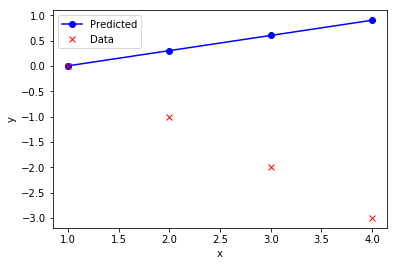

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x_data, y_pred, 'bo-', label='Predicted')
ax.plot(x_data, y_actual, 'rx', label='Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

Let us assign the variables their correct values and check the loss and plot the data.

In [6]:
fixW = tf.assign(W, [-1.])
fixb = tf.assign(b, [1.])
print(sess.run([fixW, fixb]))
print(sess.run(loss, feed_dict=
               {x:x_data,
                y:y_actual}))
y_pred_correct = sess.run(linear_model, {x:[1,2,3,4]})
print(y_pred_correct)

[array([-1.], dtype=float32), array([1.], dtype=float32)]
0.0
[ 0. -1. -2. -3.]


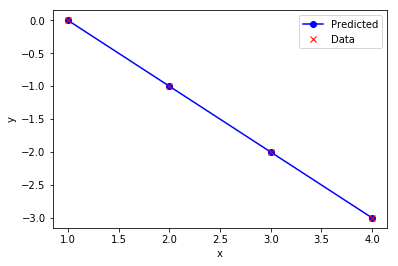

In [7]:
fig, ax = plt.subplots()
ax.plot(x_data, y_pred_correct, 'bo-', label='Predicted')
ax.plot(x_data, y_actual, 'rx', label='Data')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

We see that the loss is 0 when the variables or weights are correct and the predicted line fits the data.
Now, we will train the model using gradient descent.

In [8]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# intialise the variables back to the wrong values
sess.run(init)

In [9]:
num_epoches = 500
display_step = 20
for epoch in range(num_epoches):
    sess.run(optimizer, feed_dict={x:x_data, y:y_actual})
    if (epoch+1) % display_step == 0:
        current_loss, current_W, current_b = sess.run([loss, W, b], feed_dict={x:x_data, y:y_actual})
        print('Epoch:', '{}'.format(epoch+1), 'Loss=', '{:.9f}'.format(current_loss), \
              'W=', '{}'.format(current_W), 'b=', '{}'.format(current_b))
print('\nOptimisation finished!')
final_loss = sess.run(loss, feed_dict={x:x_data, y:y_actual})
print('Training Loss=', '{:.9f}'.format(final_loss), \
      'W=', '{}'.format(sess.run(W)), 'b=', '{}'.format(sess.run(b)))
with tf.summary.FileWriter('./my_linear_model') as writer:
    writer.add_graph(sess.graph)
sess.close()

Epoch: 20 Loss= 1.006025314 W= [-0.5826169] b= [-0.22715722]
Epoch: 40 Loss= 0.621320307 W= [-0.6719892] b= [0.03560818]
Epoch: 60 Loss= 0.383726686 W= [-0.74222463] b= [0.24210888]
Epoch: 80 Loss= 0.236989319 W= [-0.7974208] b= [0.4043925]
Epoch: 100 Loss= 0.146364361 W= [-0.84079814] b= [0.53192717]
Epoch: 120 Loss= 0.090394437 W= [-0.87488735] b= [0.6321535]
Epoch: 140 Loss= 0.055827554 W= [-0.9016771] b= [0.71091866]
Epoch: 160 Loss= 0.034479067 W= [-0.9227305] b= [0.77281827]
Epoch: 180 Loss= 0.021294251 W= [-0.9392758] b= [0.82146347]
Epoch: 200 Loss= 0.013151320 W= [-0.95227844] b= [0.8596927]
Epoch: 220 Loss= 0.008122250 W= [-0.9624968] b= [0.88973594]
Epoch: 240 Loss= 0.005016298 W= [-0.9705272] b= [0.91334623]
Epoch: 260 Loss= 0.003098064 W= [-0.976838] b= [0.931901]
Epoch: 280 Loss= 0.001913364 W= [-0.9817976] b= [0.94648266]
Epoch: 300 Loss= 0.001181682 W= [-0.98569524] b= [0.95794225]
Epoch: 320 Loss= 0.000729801 W= [-0.98875827] b= [0.9669479]
Epoch: 340 Loss= 0.000450724

We can see that the trained $W$ and $b$ are close to the actual values.

Run TensorBoard in your terminal to see the computational graph.

You should see the following graph.

![Add](images/linear_model.png)